In [2]:
import pandas as pd
import numpy as np
emicron_original = pd.read_csv("../../../Data/emicron_geih_merged.csv")  # Include the subdirectory in the file path

In [6]:
emicron = emicron_original.copy()

**filter only colombians**

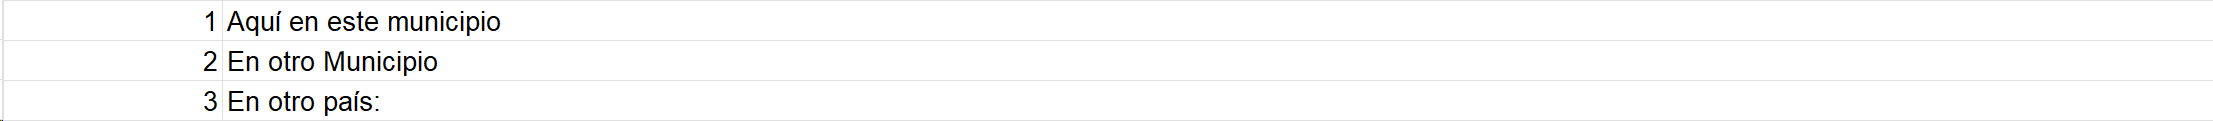

In [8]:
emicron_nat = emicron[(emicron['P3373'] == 1) | (emicron['P3373'] == 2)]

**Integrating MPI**

In [9]:
mpi = pd.read_stata("../../../Outputs/emicron-informality-mpi.dta")

In [10]:
mpi.filter(like='mpi').columns

Index(['mpi_index', 'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
       'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
       'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
       'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
       'mpi_health_ss', 'mpi_deprivations'],
      dtype='object')

In [11]:
#merge with mpi to get mpi_index
columns_to_merge = ['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'mpi_index',
                    'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
                    'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
                    'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
                    'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
                    'mpi_health_ss']

emicron = pd.merge(emicron, mpi[columns_to_merge], on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')